[View in Colaboratory](https://colab.research.google.com/github/x110/DLToolboxImg/blob/master/Planet.ipynb)

## Prepare virtual machine on google colab
1. Connect to google drive
2. Install dependencies

In [1]:
#http://forums.fast.ai/t/quick-google-colab-setup-for-part-2-week-1-along-with-pascal-voc-dataset/13650
#https://medium.com/deep-learning-turkey/google-colab-free-gpu-tutorial-e113627b9f5d
!pip install https://github.com/fastai/fastai/archive/master.zip
!pip install opencv-python
!apt update && apt install -y libsm6 libxext6
!pip3 install http://download.pytorch.org/whl/cu80/torch-0.3.0.post4-cp36-cp36m-linux_x86_64.whl 
!pip3 install torchvision

     - 90.0MB 44.6MB/s
    100% |████████████████████████████████| 1.5MB 10.0MB/s 
    100% |████████████████████████████████| 112kB 14.3MB/s 
    100% |████████████████████████████████| 174kB 9.7MB/s 
    100% |████████████████████████████████| 3.4MB 7.7MB/s 


  Retrying (Retry(total=4, connect=None, read=None, redirect=None, status=None)) after connection broken by 'ReadTimeoutError("HTTPSConnectionPool(host='files.pythonhosted.org', port=443): Read timed out. (read timeout=15)",)': /packages/5b/a5/e8b50b55b1abac9f1e3346c4242f1e42a82d368a8442cbd50c532922f6c4/torch-0.3.1-cp36-cp36m-manylinux1_x86_64.whl
    45% |██████████████▊                 | 228.1MB 34.0MB/s eta 0:00:08

    100% |████████████████████████████████| 496.4MB 30kB/s 
    100% |████████████████████████████████| 51kB 14.2MB/s 
    100% |████████████████████████████████| 61kB 18.4MB/s 
    100% |████████████████████████████████| 51kB 12.5MB/s 
    100% |████████████████████████████████| 2.2MB 12.5MB/s 
    100% |████████████████████████████████| 13.7MB 3.3MB/s 
    100% |████████████████████████████████| 92kB 19.7MB/s 
    100% |████████████████████████████████| 112kB 10.6MB/s 
    100% |████████████████████████████████| 71kB 18.0MB/s 
    100% |████████████████████████████████| 81kB 22.1MB/s 


  Running setup.py bdist_wheel for fastai ... - \ done
  Stored in directory: /tmp/pip-ephem-wheel-cache-86qbfotg/wheels/64/3d/9f/d12a217aa2531321c5b9ae96288fcae2687d3b744376e8f94f
  Running setup.py bdist_wheel for bcolz ... - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | done
  Stored in directory: /content/.cache/pip/wheels/9f/78/26/fb8c0acb91a100dc8914bf236c4eaa4b207cb876893c40b745
  Running setup.py bdist_wheel for feather-format ... - done
  Stored in directory: /content/.cache/pip/wheels/85/7d/12/2dfa5c0195f921ac935f5e8f27deada74972edc0ae9988a9c1
  Running setup.py bdist_wheel for pandas-summary ... - done
  Stored in directory: /content/.cache/pip/wheels/86/a9/6b/36b727a9ec687dac08bd3d0501cddd7b1a223943513eb04a03
  Running setup.py bdist_wheel for torchtext ... - \ 

Get:5 http://security.ubuntu.com/ubuntu artful-security/universe Sources [20.5 kB]
Get:6 http://archive.ubuntu.com/ubuntu artful-updates/universe Sources [43.2 kB]
Get:7 http://security.ubuntu.com/ubuntu artful-security/restricted amd64 Packages [2,933 B]
Get:8 http://security.ubuntu.com/ubuntu artful-security/universe amd64 Packages [77.6 kB]
Get:9 http://security.ubuntu.com/ubuntu artful-security/main amd64 Packages [220 kB]
Get:10 http://archive.ubuntu.com/ubuntu artful-updates/universe amd64 Packages [141 kB]
Get:11 http://archive.ubuntu.com/ubuntu artful-updates/multiverse amd64 Packages [4,371 B]
Get:12 http://security.ubuntu.com/ubuntu artful-security/multiverse amd64 Packages [1,815 B]
Get:13 http://archive.ubuntu.com/ubuntu artful-updates/main amd64 Packages [347 kB]
Get:14 http://archive.ubuntu.com/ubuntu artful-updates/restricted amd64 Packages [2,933 B]
Fetched 1,108 kB in 1s (571 kB/s)
Reading package lists... Done
Building dependency tree       
Reading state information.

    100% |████████████████████████████████| 592.3MB 53.1MB/s 
torchvision 0.2.1 has requirement pillow>=4.1.1, but you'll have pillow 4.0.0 which is incompatible.
plotnine 0.3.0 has requirement scipy>=1.0.0, but you'll have scipy 0.19.1 which is incompatible.
  Found existing installation: torch 0.3.1
    Uninstalling torch-0.3.1:
      Successfully uninstalled torch-0.3.1
    100% |████████████████████████████████| 2.0MB 7.4MB/s 
plotnine 0.3.0 has requirement scipy>=1.0.0, but you'll have scipy 0.19.1 which is incompatible.
  Found existing installation: Pillow 4.0.0
    Uninstalling Pillow-4.0.0:
      Successfully uninstalled Pillow-4.0.0


In [0]:
!apt-get install p7zip-full

In [60]:
!pip install --no-cache-dir -I pillow

    100% |████████████████████████████████| 2.0MB 23.5MB/s 
plotnine 0.3.0 has requirement scipy>=1.0.0, but you'll have scipy 0.19.1 which is incompatible.


## Imports

In [0]:
%matplotlib inline
#%reload_ext autoreload
#%autoreload 2

In [0]:


# This file contains all the main external libs we'll use
from fastai.imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *
from pathlib import Path

In [0]:
#!rm -r  planet/tmp

## Download Data

In [0]:
!mkdir planet

In [4]:
!wget --header="Host: storage.googleapis.com" --header="User-Agent: Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_3) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/66.0.3359.181 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8" --header="Accept-Language: en-US,en;q=0.9" "https://storage.googleapis.com/kaggle-competitions-data/kaggle/6322/train-jpg.tar.7z?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1527898376&Signature=QLMBMKykCOKzaZVXMk3R7J8dSR9iEByyI7U6ujxjMmhL4SsDbJJn70x%2BSOyGQaUIq9NKMiZC4rO%2FE%2Bm5A8yaCo2NnUlU2AmPMwMW2d1pQwW4sujvb8gajPUWjYE8bi7LXJXfCBLPCImo3nIT1KQhXX3y3YTOCcJshixkUVoaSiayen6eV2o1b8rViEdWiTlfGLaMoa63a%2BwfPBWvSKpSpowtpWIBLD7lXwqBO8QxaWOmRBCZhq0CzcSY1ft3U0ptrce78rFnI1EP5jx6d2HpDmbl4iW93DmZtzVNzVwD1xLwttVJI3AZbt2INN7sF00v%2B%2BMZMiuaoL7g9XwAvzZUyw%3D%3D" -O "train-jpg.tar.7z" -c
!wget --header="Host: storage.googleapis.com" --header="User-Agent: Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_3) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/66.0.3359.181 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8" --header="Accept-Language: en-US,en;q=0.9" "https://storage.googleapis.com/kaggle-competitions-data/kaggle/6322/train_v2.csv.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1527898423&Signature=p%2B3rDB3IuxFvdfKKwqqcohICsDNQKqM6lQLRj5gTENcyFwLKMTpxjv6A%2BOr2V448f7%2FLIeZ2dhNhVM7tsHorwuoFDFlvjQKgjr0Z4B%2F9M5mJqx9sBC4da3C%2FyY7BQnk%2F%2BQjVbdaFljwJbrJHg7WnxCqZFKeA%2ByphgRN0EECnp%2B%2FWMwNRKoQ5oguJfCu4mOUSvaBjwKMbz8RKHoilo7qsjvIqfboak%2B8uYe7j4fzSHRcm2joXiWq6KSuUo3cikNmeEjg%2BOOjb%2Fa5D3NQqKmLlvLDKMwMHolhIz7rG1EEq4gBPO00tr26DMzLtQQ5YbcyijvsIvBwSS%2B3ZOylwUDaupw%3D%3D" -O "train_v2.csv.zip" -c
!wget --header="Host: storage.googleapis.com" --header="User-Agent: Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_3) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/66.0.3359.181 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8" --header="Accept-Language: en-US,en;q=0.9" "https://storage.googleapis.com/kaggle-competitions-data/kaggle/6322/test_v2_file_mapping.csv.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1527898459&Signature=lm%2BEqwBcAccngUqhOPdVBZ3HfC6oDEQDF2JtHiHbILAOdzj27wQ6IAjtsPjATmX%2BKamKc96YM5wtclSPXWniY5E9I6GKzKnm44lLRnjihaYRX2%2FcPUHvrT4JGmVJCoWN6%2FXpLeWkLTKmwdLqW1DnJIqyjY5pVWRgYJG9%2FqFHYrbmjjI3fJpVYTU1mvrpatkOG6rWgQwqkYPsy6IXIvmk3ABCGviQcc%2FAVSaXqSsXI4kGitKCxehjON%2BciDVuVpDuRVDXKrR%2FmSo50pkCAg24XKuiDzcyq%2BteULmX3HPPrWWqkjCz1bReaLEWnVGMkpQBemD5HhPbMZhCXWCL5FN13w%3D%3D" -O "test_v2_file_mapping.csv.zip" -c
!wget --header="Host: storage.googleapis.com" --header="User-Agent: Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_3) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/66.0.3359.181 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8" --header="Accept-Language: en-US,en;q=0.9" "https://storage.googleapis.com/kaggle-competitions-data/kaggle/6322/test-jpg.tar.7z?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1527898490&Signature=HX03faLgOSaFsXNdcOwtx5fgzz8ev3MOqjny22DEZKE%2BER9UDcLEerijZxVMnVvdZl9iqKVVPA8ffJgBtloqT0SJjzn0i%2BCFctB1O5lxDloVh73kj8AeAfwtHYq3Y87JB4ROyibrIancXl1DI528y0G%2FR2VzvLNxSiCIkG5blFLd94lp3BEbALJh6qJXc1A305D0azMP0q5ylhSkHGdpj1ZodbyaOJXpZHGOzUrqAUW%2BgBKNF73og0BKe%2Bq4uP8z4hzTf1zpr1Gi7kA4iUf1dWzPs0emLZBb93uX3HY9QUdZbAseNSin1qiAge7HbWkQq7dN0fT4%2Fbe%2FTSccJ4krcg%3D%3D" -O "test-jpg.tar.7z" -c
!wget --header="Host: storage.googleapis.com" --header="User-Agent: Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_3) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/66.0.3359.181 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8" --header="Accept-Language: en-US,en;q=0.9" "https://storage.googleapis.com/kaggle-competitions-data/kaggle/6322/test-jpg-additional.tar.7z?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1527898519&Signature=WVlBsEtn4t0ze0BsQ1Ii7JwiixMWaXS7QOQUdrenzeXd3gIYRZcOjAPpH1h90MZsm5fZ6QAnZGV9OlOTxGuDCt14s0zgqiYBMzW8mk2Gh%2F%2BwLgs8Y3b4SPVNnqIxMXXjngE3QfddPA8uilZus%2BQYt2A8Vn1%2FiuWnWhySOF3rLBVLODq1VAVEhY4ujLlkNa1kOtt60NlOn%2FVnZqCDI7LAjTE63MQJQY7bkgDrfdA%2FfUzFTguGEns7LiD3ieVb4edWhOqxa3xtsxDxPojzphvyljJhyNs58HecobzCsz7LaPi5N7j22TROqRHmD70XeevlF%2BNpTmIzvGOzJ4nHwndpcw%3D%3D" -O "test-jpg-additional.tar.7z" -c
!wget --header="Host: storage.googleapis.com" --header="User-Agent: Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_3) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/66.0.3359.181 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8" --header="Accept-Language: en-US,en;q=0.9" "https://storage.googleapis.com/kaggle-competitions-data/kaggle/6322/sample_submission_v2.csv.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1527898543&Signature=AsR7mbE%2Fo3XOUxUBAQRb1bl5PVjiG%2FsyvTs0t1hKBNPStTAwn%2BbFGD1rRTlY7IkYpt%2FyD6UpqNXKzNuwAOjt0jObOZgwctVLDJ2ziljZuU5LQSCml9pC7S1ZOC%2B5vnalABlGMTGeOGDkJ0Cv0NR8XjWC6hRs3y8%2BRkLqk5c%2BdsHbjSdvFBSSPMS1OA3fea6t9gc0gaSBDV92XnSTnTLD0w4oP2Lw9vKrOLzCxBeCD9bKfJRD%2FVmzmIaVF8aCNFXnXzSWYv6QObMcW%2BR02mier6Ar2hHSg20H1BxoUM5er8F5uVzhGolcf2yORnWOVSp59SFbgO5ZwgyqF5bkBpK9Rw%3D%3D" -O "sample_submission_v2.csv.zip" -c

--2018-05-30 00:16:16--  https://storage.googleapis.com/kaggle-competitions-data/kaggle/6322/train-jpg.tar.7z?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1527898376&Signature=QLMBMKykCOKzaZVXMk3R7J8dSR9iEByyI7U6ujxjMmhL4SsDbJJn70x%2BSOyGQaUIq9NKMiZC4rO%2FE%2Bm5A8yaCo2NnUlU2AmPMwMW2d1pQwW4sujvb8gajPUWjYE8bi7LXJXfCBLPCImo3nIT1KQhXX3y3YTOCcJshixkUVoaSiayen6eV2o1b8rViEdWiTlfGLaMoa63a%2BwfPBWvSKpSpowtpWIBLD7lXwqBO8QxaWOmRBCZhq0CzcSY1ft3U0ptrce78rFnI1EP5jx6d2HpDmbl4iW93DmZtzVNzVwD1xLwttVJI3AZbt2INN7sF00v%2B%2BMZMiuaoL7g9XwAvzZUyw%3D%3D
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.197.128, 2607:f8b0:400e:c08::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.197.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 629296207 (600M) [application/x-7z-compressed]
Saving to: ‘train-jpg.tar.7z’

train-jpg.tar.7z    100%[===================>] 600.14M   171MB/s    in 5.0s    

2018-05-30 00:16:21 (121 MB/

test-jpg.tar.7z     100%[===================>] 603.07M   154MB/s    in 4.0s    

2018-05-30 00:16:29 (151 MB/s) - ‘test-jpg.tar.7z’ saved [632362315/632362315]

--2018-05-30 00:16:30--  https://storage.googleapis.com/kaggle-competitions-data/kaggle/6322/test-jpg-additional.tar.7z?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1527898519&Signature=WVlBsEtn4t0ze0BsQ1Ii7JwiixMWaXS7QOQUdrenzeXd3gIYRZcOjAPpH1h90MZsm5fZ6QAnZGV9OlOTxGuDCt14s0zgqiYBMzW8mk2Gh%2F%2BwLgs8Y3b4SPVNnqIxMXXjngE3QfddPA8uilZus%2BQYt2A8Vn1%2FiuWnWhySOF3rLBVLODq1VAVEhY4ujLlkNa1kOtt60NlOn%2FVnZqCDI7LAjTE63MQJQY7bkgDrfdA%2FfUzFTguGEns7LiD3ieVb4edWhOqxa3xtsxDxPojzphvyljJhyNs58HecobzCsz7LaPi5N7j22TROqRHmD70XeevlF%2BNpTmIzvGOzJ4nHwndpcw%3D%3D
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.195.128, 2607:f8b0:400e:c03::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.195.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 318407195 (304

In [0]:
!7z x -so test-jpg-additional.tar.7z | tar xf - -C planet
!7z x -so test-jpg.tar.7z | tar xf - -C planet
!7z x -so train-jpg.tar.7z | tar xf - -C planet
!unzip sample_submission_v2.csv.zip -d planet
!unzip test_v2_file_mapping.csv.zip -d planet
!unzip train_v2.csv.zip -d planet

In [19]:
!ls planet

__MACOSX		  test-jpg-additional	    train_v2.csv
sample_submission_v2.csv  test_v2_file_mapping.csv
test-jpg		  train-jpg


##Download Model

In [0]:
#!wget http://files.fast.ai/models/weights.tgz -d /usr/local/lib/python3.6/dist-packages/fastai

In [0]:
#!tar -xvzf weights.tgz

In [0]:
#!mv weights /usr/local/lib/python3.6/dist-packages/fastai/


##Explore Data

In [0]:
PATH = Path("/content/planet/")

In [4]:
list(PATH.iterdir())

[PosixPath('/content/planet/sample_submission_v2.csv'),
 PosixPath('/content/planet/__MACOSX'),
 PosixPath('/content/planet/test_v2_file_mapping.csv'),
 PosixPath('/content/planet/train_v2.csv'),
 PosixPath('/content/planet/train-jpg'),
 PosixPath('/content/planet/test-jpg-additional'),
 PosixPath('/content/planet/test-jpg')]

In [0]:
label_csv = PATH/'train_v2.csv'

In [6]:
label_df = pd.read_csv(label_csv)
label_df.head()

,image_name,tags
0,train_0,haze primary
1,train_1,agriculture clear primary water
2,train_2,clear primary
3,train_3,clear primary
4,train_4,agriculture clear habitation primary road


##Model

In [0]:
PATH = "/content/planet/"
sz = 256
arch = resnet34

In [0]:
n = len(list(open(label_csv)))-1
val_idxs = get_cv_idxs(n)

In [0]:
def get_data(sz,bs=64):
  tfms = tfms_from_model(arch,
                         sz,
                         aug_tfms=transforms_top_down,
                         max_zoom=1.05)
  
  data = ImageClassifierData.from_csv(PATH,
                                     'train-jpg',
                                     label_csv,
                                     val_idxs=val_idxs,
                                     tfms=tfms,
                                     suffix='.jpg',
                                     test_name = 'test-jpg')
  return data

In [0]:
data = get_data(256)

In [0]:
data_iter = iter(data.val_dl)

In [0]:
x,y = next(data_iter)

In [13]:
list(zip(data.classes,y[0]))

[('agriculture', 1.0),
 ('artisinal_mine', 0.0),
 ('bare_ground', 0.0),
 ('blooming', 0.0),
 ('blow_down', 0.0),
 ('clear', 1.0),
 ('cloudy', 0.0),
 ('conventional_mine', 0.0),
 ('cultivation', 0.0),
 ('habitation', 0.0),
 ('haze', 0.0),
 ('partly_cloudy', 0.0),
 ('primary', 1.0),
 ('road', 0.0),
 ('selective_logging', 0.0),
 ('slash_burn', 0.0),
 ('water', 1.0)]

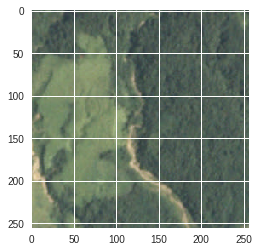

In [14]:
plt.imshow(data.val_ds.denorm(to_np(x))[0]*1.4);

In [0]:
sz = 64

In [16]:
data = get_data(sz)
data = data.resize(int(sz*1.3),'tmp')

In [0]:
from sklearn.metrics import fbeta_score
import warnings

def f2(preds, targs, start=0.17, end=0.24, step=0.01):
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        return max([fbeta_score(targs, (preds>th), 2, average='samples')
                    for th in np.arange(start,end,step)])

In [18]:
metrics=[f2]
learn = ConvLearner.pretrained(arch,data,metrics=metrics)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /content/.torch/models/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:03<00:00, 26742059.23it/s]


In [19]:
learn.lr_find()
learn.sched.plot()

epoch      trn_loss   val_loss   f2         
    0      0.222521   0.267155   0.814794  



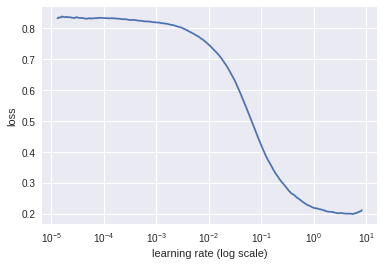

In [20]:
learn.sched.plot()

In [22]:
learn.fit(.1,3)

epoch      trn_loss   val_loss   f2         
    0      0.152688   0.133558   0.885349  
 38%|███▊      | 191/506 [00:25<00:41,  7.59it/s, loss=0.146]

    1      0.143421   0.128419   0.888396  
 78%|███████▊  | 397/506 [00:46<00:12,  8.54it/s, loss=0.14]

    2      0.138609   0.125848   0.891107  



[array([0.12585]), 0.891107455524129]

In [0]:
lr = .1
lrs = [lr/9,lr/3,lr]

In [25]:
learn.unfreeze()
learn.fit(lrs, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   f2         
    0      0.124011   0.111565   0.90593   
 25%|██▌       | 128/506 [00:29<01:26,  4.35it/s, loss=0.125]

    1      0.11829    0.105475   0.911467  
 51%|█████     | 257/506 [00:58<00:56,  4.37it/s, loss=0.115]

    2      0.1119     0.101671   0.915834  
 66%|██████▌   | 332/506 [01:14<00:38,  4.48it/s, loss=0.114]

    3      0.111542   0.101983   0.914299  
 74%|███████▍  | 375/506 [01:21<00:28,  4.57it/s, loss=0.11]

    4      0.109479   0.098888   0.917212  
 79%|███████▉  | 401/506 [01:26<00:22,  4.62it/s, loss=0.105]

    5      0.10276    0.097772   0.917089  
 82%|████████▏ | 415/506 [01:32<00:20,  4.47it/s, loss=0.104]

    6      0.102696   0.09775    0.917554  



[array([0.09775]), 0.917553560825829]

In [26]:
sz

64

In [0]:
learn.save('64_pre')
learn.load('64_pre')

In [28]:
learn.fit(lrs, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   f2         
    0      0.10055    0.097068   0.918536  
 25%|██▌       | 128/506 [00:29<01:26,  4.38it/s, loss=0.104]

    1      0.103235   0.097573   0.91836   
 51%|█████     | 257/506 [00:58<00:56,  4.40it/s, loss=0.0996]

    2      0.098429   0.096373   0.918846  
 65%|██████▌   | 330/506 [01:13<00:38,  4.51it/s, loss=0.103]

    3      0.101331   0.098354   0.917771  
 74%|███████▍  | 374/506 [01:21<00:28,  4.57it/s, loss=0.0973]

    4      0.099327   0.097458   0.918452  
 78%|███████▊  | 395/506 [01:25<00:24,  4.62it/s, loss=0.0965]

    5      0.094658   0.095934   0.920021  
 80%|████████  | 407/506 [01:29<00:21,  4.55it/s, loss=0.0927]

    6      0.093594   0.095613   0.920022  



[array([0.09561]), 0.9200218333031268]

In [0]:
sz = 128

In [30]:
data = get_data(sz)
data = data.resize(int(sz*1.3),'tmp')
learn.set_data(data)

In [31]:
learn.freeze()
learn.fit(.1,3,cycle_len=1,cycle_mult=2)

epoch      trn_loss   val_loss   f2         
    0      0.101731   0.094319   0.919891  
 25%|██▌       | 128/506 [00:29<01:26,  4.36it/s, loss=0.0995]

    1      0.098217   0.093249   0.920284  
 50%|█████     | 253/506 [00:56<00:56,  4.47it/s, loss=0.0981]

    2      0.097784   0.092384   0.922249  
 64%|██████▍   | 325/506 [01:13<00:40,  4.45it/s, loss=0.1]

    3      0.097639   0.092518   0.922098  
 73%|███████▎  | 367/506 [01:21<00:30,  4.49it/s, loss=0.0984]

    4      0.09534    0.091937   0.921902  
 77%|███████▋  | 390/506 [01:25<00:25,  4.56it/s, loss=0.0976]

    5      0.098059   0.091634   0.922236  
 80%|████████  | 405/506 [01:29<00:22,  4.54it/s, loss=0.0955]

    6      0.096947   0.091651   0.922173  



[array([0.09165]), 0.9221731823315176]

In [32]:
learn.unfreeze()
learn.fit(lrs,3,cycle_len=1,cycle_mult=2)

epoch      trn_loss   val_loss   f2         
    0      0.095098   0.087957   0.925584  
 25%|██▍       | 124/506 [01:11<03:41,  1.72it/s, loss=0.0946]

    1      0.093113   0.087457   0.925804  
 49%|████▉     | 249/506 [02:22<02:26,  1.75it/s, loss=0.0917]

    2      0.093463   0.086394   0.927909  
 64%|██████▎   | 322/506 [03:03<01:44,  1.76it/s, loss=0.0926]

    3      0.093731   0.089296   0.925877  
 72%|███████▏  | 364/506 [03:28<01:21,  1.75it/s, loss=0.0867]

    4      0.090495   0.08656    0.928216  
 77%|███████▋  | 389/506 [03:41<01:06,  1.75it/s, loss=0.0855]

    5      0.087024   0.085374   0.928892  
 80%|███████▉  | 404/506 [03:50<00:58,  1.75it/s, loss=0.0839]

    6      0.08414    0.084812   0.929827  



[array([0.08481]), 0.9298271679679321]

In [33]:
sz=256
data = get_data(sz)
data = data.resize(int(sz*1.3),'tmp')


In [35]:
learn.set_data(data)
learn.freeze()
learn.fit(.1,3,cycle_len=1,cycle_mult=2)

epoch      trn_loss   val_loss   f2         
    0      0.09059    0.088776   0.926077  
 25%|██▍       | 124/506 [01:27<04:30,  1.41it/s, loss=0.0929]

    1      0.091734   0.087339   0.927904  
 49%|████▉     | 249/506 [02:50<02:55,  1.46it/s, loss=0.0931]

    2      0.092337   0.087211   0.927083  
 64%|██████▎   | 322/506 [03:38<02:04,  1.47it/s, loss=0.0912]

    3      0.094421   0.086778   0.927504  
 72%|███████▏  | 364/506 [04:07<01:36,  1.47it/s, loss=0.0891]

    4      0.090794   0.086527   0.927865  
 77%|███████▋  | 389/506 [04:22<01:18,  1.48it/s, loss=0.0907]

    5      0.091209   0.086269   0.928356  
 80%|███████▉  | 404/506 [04:33<01:09,  1.48it/s, loss=0.0901]

    6      0.089563   0.086125   0.928753  



[array([0.08612]), 0.9287527476793832]

In [37]:
learn.set_data(data)
learn.unfreeze()
learn.fit(lrs,3,cycle_len=1,cycle_mult=2)

epoch      trn_loss   val_loss   f2         
    0      0.091353   0.083262   0.931047  
 25%|██▍       | 124/506 [03:50<11:50,  1.86s/it, loss=0.0898]

    1      0.088503   0.08356    0.930647  
 49%|████▉     | 249/506 [07:41<07:55,  1.85s/it, loss=0.0864]

    2      0.082721   0.082633   0.931975  
 64%|██████▎   | 322/506 [09:56<05:40,  1.85s/it, loss=0.0858]

    3      0.087268   0.084102   0.929705  
 72%|███████▏  | 364/506 [11:14<04:23,  1.85s/it, loss=0.0864]

    4      0.084344   0.083048   0.929647  
 77%|███████▋  | 389/506 [11:58<03:36,  1.85s/it, loss=0.0818]

    5      0.081493   0.081686   0.932642  
 80%|███████▉  | 404/506 [12:26<03:08,  1.85s/it, loss=0.0794]

    6      0.079387   0.081632   0.932098  



[array([0.08163]), 0.932097625357117]

In [40]:
log_preds,y = learn.TTA()

In [41]:
preds=np.mean(np.exp(log_preds),0)
f2(preds,y)

0.4826461087123383

In [0]:
log_preds = learn.predict()

In [45]:
preds=np.exp(log_preds)
f2(preds,y)

0.4826461087123383

In [0]:
learn.save('planet')
learn.load('planet')